Support Vector Machine SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('bank_loan.csv')
data.drop(["Employment_Type", "Residence_Type", "Age", "Loan_Term_Months","Annual_Income_INR", "Loan_Amount_INR","EMI", "Existing_Loans_Count", "Dependents"], axis=1, inplace=True)
feature_names = [data["Credit_Score"], data["Monthly_Income_INR"]]
data.sample(10)

,Monthly_Income_INR,Credit_Score,Loan_Approved
366,36063,860,0
288,65022,372,0
6,56819,416,0
182,137349,342,0
123,200227,713,0
169,178772,566,0
56,160516,556,0
401,175509,378,0
348,98343,640,0
275,139529,466,0


In [3]:
x = data.drop("Loan_Approved", axis=1)
y = data["Loan_Approved"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [5]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


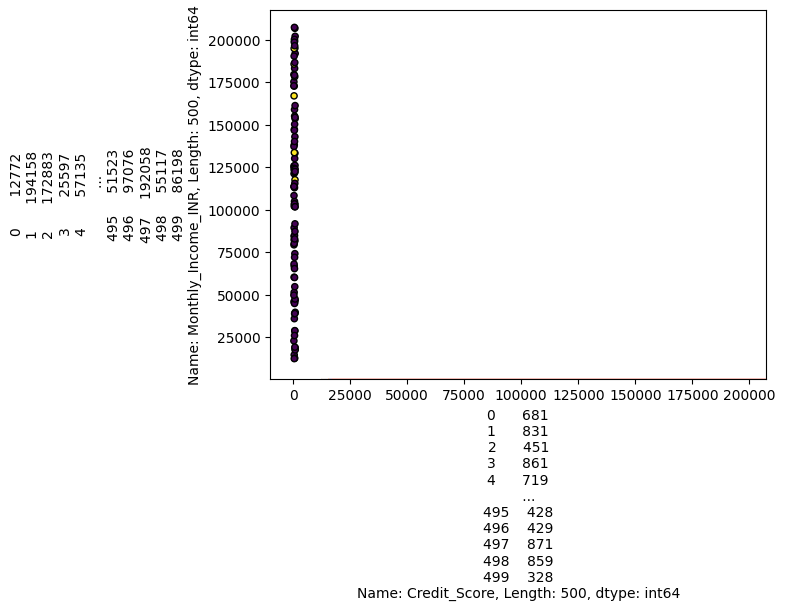

In [8]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
        model,
        x,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=data["Credit_Score"],
        ylabel=data["Monthly_Income_INR"],
    )

plt.scatter(x_test["Credit_Score"], x_test["Monthly_Income_INR"], 
            c=y_test, 
            s=20, edgecolors="k")
plt.show()